In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('train_E6oV3lV.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [5]:
df1 = df.query('label==1').sample(frac=1.0)

In [6]:
df1.shape

(2242, 3)

In [7]:
n_df = pd.concat([df,df1],ignore_index=True)
n_df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,4484,4484


In [8]:
count_class_0, count_class_1 = df['label'].value_counts()

In [9]:
df_class_0 =  df.query('label==0')
df_class_1 =  df.query('label==1')

In [10]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1],ignore_index=True ,axis=0)

In [11]:
df_under.shape

(4484, 3)

In [12]:
df_under.groupby('label').count()

,id,tweet
label,,
0,2242,2242
1,2242,2242


In [13]:
df = df_under

In [14]:
X = df['tweet']
Y = df['label']
Y_org = Y

In [15]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

# add padding
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=400)

In [16]:
max(df['tweet'], key=len)

'we all know that the difference between kpekere $ plantain chip na packagingð\x9f\x99\x8c good evening #  ramadan day 14 ð\x9f\x8d\x8fð\x9f\x8d\x89ð\x9f\x8d\x8cð\x9f\x8d\x8dð\x9f\x9a¿ð\x9f\x98´ð\x9f\x95\x92ð\x9f\x8d\x9bð\x9f\x8d\x97ð\x9f\x91\x8a'

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 35)
pca.fit(X)
X = pca.transform(X);

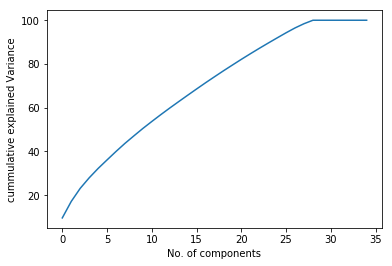

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [22]:
classifier = Sequential()
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu' ,input_dim =X.shape[1]))

In [23]:
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(2,kernel_initializer='uniform', activation='sigmoid'))

In [24]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [25]:
from sklearn.preprocessing import OneHotEncoder
y_e = OneHotEncoder()
Y_train_org = Y_train
Y_test_org = Y_test
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
y_e.fit(Y_train)
Y_train = y_e.transform(Y_train)
Y_test = y_e.transform(Y_test)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [26]:
Y_train

<3587x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3587 stored elements in Compressed Sparse Row format>

In [27]:
Y_test

<897x2 sparse matrix of type '<class 'numpy.float64'>'
	with 897 stored elements in Compressed Sparse Row format>

In [30]:
checker = classifier.fit(X_train, Y_train, batch_size=32, epochs=300, validation_data = (X_test, Y_test))

Train on 3587 samples, validate on 897 samples
Epoch 1/300
3587/3587 [==============================] - 1s 154us/step - loss: 0.4412 - acc: 0.8037 - val_loss: 0.6969 - val_acc: 0.6945
Epoch 2/300
3587/3587 [==============================] - 1s 145us/step - loss: 0.4350 - acc: 0.7998 - val_loss: 0.6856 - val_acc: 0.7012
Epoch 3/300
3587/3587 [==============================] - 1s 145us/step - loss: 0.4387 - acc: 0.7966 - val_loss: 0.7008 - val_acc: 0.7001
Epoch 4/300
3587/3587 [==============================] - 1s 148us/step - loss: 0.4357 - acc: 0.7986 - val_loss: 0.6958 - val_acc: 0.6912
Epoch 5/300
3587/3587 [==============================] - 1s 152us/step - loss: 0.4353 - acc: 0.8035 - val_loss: 0.7039 - val_acc: 0.6878
Epoch 6/300
3587/3587 [==============================] - 1s 151us/step - loss: 0.4347 - acc: 0.7983 - val_loss: 0.7037 - val_acc: 0.6957
Epoch 7/300
3587/3587 [==============================] - 1s 155us/step - loss: 0.4290 - acc: 0.8062 - val_loss: 0.7219 - val_acc: 0

3587/3587 [==============================] - 1s 147us/step - loss: 0.3918 - acc: 0.8249 - val_loss: 0.8188 - val_acc: 0.6945
Epoch 61/300
3587/3587 [==============================] - 1s 144us/step - loss: 0.3957 - acc: 0.8177 - val_loss: 0.8171 - val_acc: 0.6957
Epoch 62/300
3587/3587 [==============================] - 1s 141us/step - loss: 0.3918 - acc: 0.8213 - val_loss: 0.8302 - val_acc: 0.6923
Epoch 63/300
3587/3587 [==============================] - 1s 141us/step - loss: 0.3933 - acc: 0.8188 - val_loss: 0.8428 - val_acc: 0.6945
Epoch 64/300
3587/3587 [==============================] - 1s 140us/step - loss: 0.3857 - acc: 0.8249 - val_loss: 0.8266 - val_acc: 0.6867
Epoch 65/300
3587/3587 [==============================] - 1s 291us/step - loss: 0.3873 - acc: 0.8283 - val_loss: 0.8345 - val_acc: 0.6990
Epoch 66/300
3587/3587 [==============================] - 1s 185us/step - loss: 0.3806 - acc: 0.8323 - val_loss: 0.8223 - val_acc: 0.6945
Epoch 67/300
3587/3587 [=======================

3587/3587 [==============================] - 1s 141us/step - loss: 0.3680 - acc: 0.8347 - val_loss: 0.8833 - val_acc: 0.6934
Epoch 120/300
3587/3587 [==============================] - 1s 182us/step - loss: 0.3687 - acc: 0.8316 - val_loss: 0.9000 - val_acc: 0.6934
Epoch 121/300
3587/3587 [==============================] - 1s 180us/step - loss: 0.3714 - acc: 0.8291 - val_loss: 0.9036 - val_acc: 0.6923
Epoch 122/300
3587/3587 [==============================] - 1s 149us/step - loss: 0.3790 - acc: 0.8290 - val_loss: 0.8821 - val_acc: 0.6934
Epoch 123/300
3587/3587 [==============================] - 1s 150us/step - loss: 0.3751 - acc: 0.8325 - val_loss: 0.8717 - val_acc: 0.7023
Epoch 124/300
3587/3587 [==============================] - 1s 152us/step - loss: 0.3690 - acc: 0.8333 - val_loss: 0.8871 - val_acc: 0.6990
Epoch 125/300
3587/3587 [==============================] - 1s 154us/step - loss: 0.3801 - acc: 0.8285 - val_loss: 0.8694 - val_acc: 0.7035
Epoch 126/300
3587/3587 [================

3587/3587 [==============================] - 1s 185us/step - loss: 0.3548 - acc: 0.8428 - val_loss: 0.9943 - val_acc: 0.7113
Epoch 179/300
3587/3587 [==============================] - 1s 172us/step - loss: 0.3453 - acc: 0.8464 - val_loss: 0.9822 - val_acc: 0.7046
Epoch 180/300
3587/3587 [==============================] - 1s 153us/step - loss: 0.3890 - acc: 0.8249 - val_loss: 0.9601 - val_acc: 0.7001
Epoch 181/300
3587/3587 [==============================] - 1s 193us/step - loss: 0.3741 - acc: 0.8319 - val_loss: 0.9927 - val_acc: 0.6945
Epoch 182/300
3587/3587 [==============================] - 1s 175us/step - loss: 0.3655 - acc: 0.8386 - val_loss: 0.9787 - val_acc: 0.7001
Epoch 183/300
3587/3587 [==============================] - 1s 180us/step - loss: 0.3660 - acc: 0.8375 - val_loss: 0.9860 - val_acc: 0.6957
Epoch 184/300
3587/3587 [==============================] - 1s 179us/step - loss: 0.3530 - acc: 0.8433 - val_loss: 1.0024 - val_acc: 0.6923
Epoch 185/300
3587/3587 [================

3587/3587 [==============================] - 1s 188us/step - loss: 0.3360 - acc: 0.8458 - val_loss: 1.0655 - val_acc: 0.7012
Epoch 238/300
3587/3587 [==============================] - 1s 160us/step - loss: 0.3395 - acc: 0.8467 - val_loss: 1.0564 - val_acc: 0.7012
Epoch 239/300
3587/3587 [==============================] - 1s 182us/step - loss: 0.3574 - acc: 0.8403 - val_loss: 1.0192 - val_acc: 0.7113
Epoch 240/300
3587/3587 [==============================] - 1s 165us/step - loss: 0.3513 - acc: 0.8430 - val_loss: 1.0233 - val_acc: 0.6934
Epoch 241/300
3587/3587 [==============================] - 1s 180us/step - loss: 0.3589 - acc: 0.8422 - val_loss: 1.0288 - val_acc: 0.7001
Epoch 242/300
3587/3587 [==============================] - 1s 169us/step - loss: 0.3524 - acc: 0.8394 - val_loss: 1.0146 - val_acc: 0.7001
Epoch 243/300
3587/3587 [==============================] - 1s 179us/step - loss: 0.3408 - acc: 0.8475 - val_loss: 1.0275 - val_acc: 0.7012
Epoch 244/300
3587/3587 [================

3587/3587 [==============================] - 1s 151us/step - loss: 0.3314 - acc: 0.8482 - val_loss: 1.0982 - val_acc: 0.6901
Epoch 297/300
3587/3587 [==============================] - 1s 142us/step - loss: 0.3250 - acc: 0.8548 - val_loss: 1.1140 - val_acc: 0.6968
Epoch 298/300
3587/3587 [==============================] - 1s 145us/step - loss: 0.3371 - acc: 0.8500 - val_loss: 1.1270 - val_acc: 0.7057
Epoch 299/300
3587/3587 [==============================] - 1s 146us/step - loss: 0.3418 - acc: 0.8478 - val_loss: 1.1573 - val_acc: 0.6990
Epoch 300/300
3587/3587 [==============================] - 1s 146us/step - loss: 0.3353 - acc: 0.8478 - val_loss: 1.0504 - val_acc: 0.7001
